In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = load_digits().data
Y = load_digits().target

In [6]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


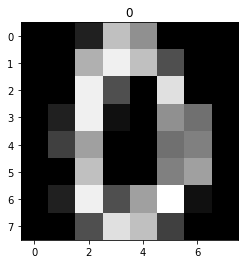

In [14]:
plt.imshow(X[130].reshape(8,-1),cmap='gray')
plt.title(Y[130])
plt.show()

In [16]:
print(X[130])

[ 0.  0.  2. 12.  9.  0.  0.  0.  0.  0. 11. 15. 12.  5.  0.  0.  0.  0.
 15.  5.  0. 14.  0.  0.  0.  2. 15.  1.  0.  9.  7.  0.  0.  4. 10.  0.
  0.  7.  8.  0.  0.  0. 12.  0.  0.  8. 10.  0.  0.  2. 15.  5. 10. 16.
  1.  0.  0.  0.  5. 14. 12.  4.  0.  0.]


- As this is a gray image, it has only 1 channel
- Values are from 0-15
    - 0 - Black
    - 1 - White
    - In between are the shades of gray

- As these are discrete values, it makes sense to use Multinomial model, we will train both Gausian and Multinomial and then compare accuracies

## Train Models

In [18]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [19]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [20]:
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
#score
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


- Multinomial is giving 90% accuracy
- Gaussian is giving us 85% accuracy

In [26]:
cross_val_score(mnb,X,Y,scoring='accuracy',cv=10).mean()

0.8797858472998138

In [27]:
cross_val_score(gnb,X,Y,scoring='accuracy',cv=10).mean()

0.8113904407200497

- As thought Multinomial works well on MNIST dataset

## Generate Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [32]:
Y_mnb = mnb.predict(X)
cnf_mnb = confusion_matrix(Y,Y_mnb)
print(cnf_mnb)

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


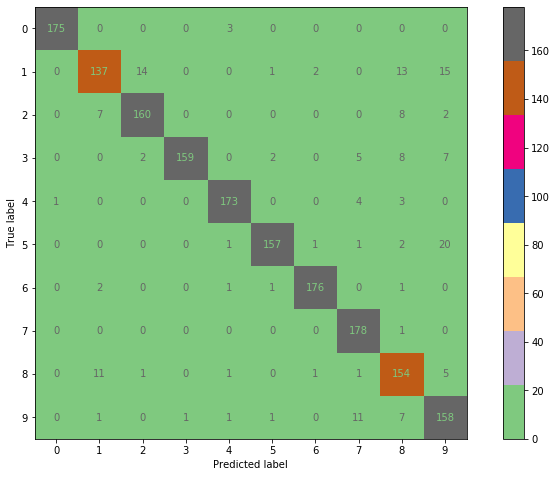

In [41]:
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0,0,1,1])
plot_confusion_matrix(mnb,X,Y,ax=axes,cmap=plt.cm.Accent,values_format='.4g')

plt.show()

### Diagonal entries represents #Number of elements where predicted class == Actual class